In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")
print("Setup complete - ready to start!")


All libraries imported successfully!
Setup complete - ready to start!


In [6]:
# Load the dataset - CHANGE THE FILENAME TO MATCH YOUR FILE
df = pd.read_csv('Dataset .csv')  # Replace 'zomato.csv' with your actual filename

# Display basic information about the dataset
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of restaurants: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

# Show first 5 rows
print("\nFirst 5 rows of the dataset:")
df.head()


Dataset loaded successfully!
Dataset shape: (9551, 21)
Number of restaurants: 9551
Number of features: 21

First 5 rows of the dataset:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
# Cell 3: Explore Your Data

# 1. Check column names
print("Column names:")
print(df.columns.tolist())

# 2. Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# 3. Display basic statistics for the target variable 'Aggregate rating'
print("\nAggregate rating statistics:")
print(df['Aggregate rating'].describe())

# 4. View the first few rows to verify data loading
print("\nFirst 5 rows of the dataset:")
df.head()


Column names:
['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']

Missing values per column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Aggregate rating statistics:
count    9551.000000
mean   

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


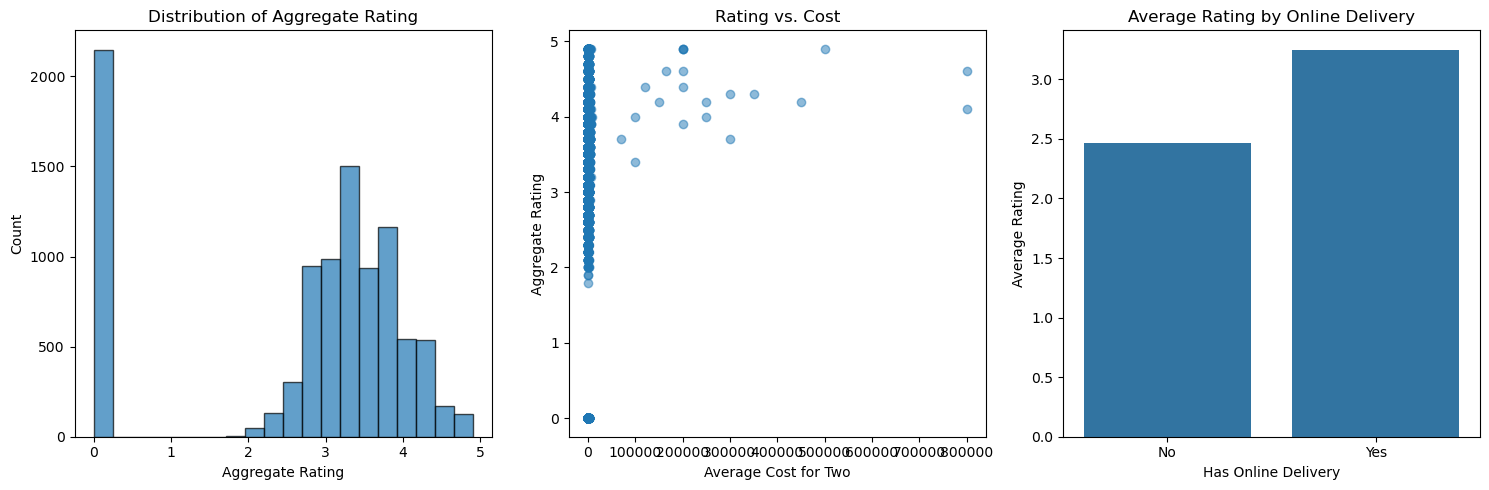

In [8]:
# Cell 4: Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Plot 1: Distribution of Aggregate Rating
plt.subplot(1, 3, 1)
plt.hist(df['Aggregate rating'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')

# Plot 2: Aggregate Rating vs Average Cost for Two
plt.subplot(1, 3, 2)
plt.scatter(df['Average Cost for two'], df['Aggregate rating'], alpha=0.5)
plt.title('Rating vs. Cost')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')

# Plot 3: Average Rating by Online Delivery Availability
plt.subplot(1, 3, 3)
if 'Has Online delivery' in df.columns:
    delivery_group = df.groupby('Has Online delivery')['Aggregate rating'].mean()
    sns.barplot(x=delivery_group.index, y=delivery_group.values)
    plt.title('Average Rating by Online Delivery')
    plt.xlabel('Has Online Delivery')
    plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()


In [9]:
# Cell 5: Data Cleaning

# 1. Remove rows with missing or zero ratings
initial_count = df.shape[0]
df_clean = df[df['Aggregate rating'] > 0].copy()
removed_count = initial_count - df_clean.shape[0]
print(f"Removed {removed_count} rows with zero or missing ratings")

# 2. Fill missing values in 'Average Cost for two'
if df_clean['Average Cost for two'].isnull().any():
    median_cost = df_clean['Average Cost for two'].median()
    df_clean['Average Cost for two'].fillna(median_cost, inplace=True)
    print(f"Filled missing 'Average Cost for two' with median value: {median_cost}")

# 3. Fill missing values in key categorical columns
for col in ['Cuisines', 'City', 'Locality']:
    if col in df_clean.columns and df_clean[col].isnull().any():
        df_clean[col].fillna('Unknown', inplace=True)
        print(f"Filled missing '{col}' with 'Unknown'")

# 4. Verify cleaning results
print("\nAfter cleaning:")
print(df_clean.isnull().sum())
print(f"Cleaned dataset shape: {df_clean.shape}")


Removed 2148 rows with zero or missing ratings
Filled missing 'Cuisines' with 'Unknown'

After cleaning:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Cleaned dataset shape: (7403, 21)


In [11]:
# Cell 6: Feature Engineering

from sklearn.preprocessing import LabelEncoder

print("Starting feature engineering...")

# 1. Encode categorical features
label_encoders = {}
categorical_features = ['City', 'Locality', 'Cuisines', 'Currency', 'Rating color', 'Rating text']

for col in categorical_features:
    if col in df_clean.columns:
        le = LabelEncoder()
        df_clean[col + '_encoded'] = le.fit_transform(df_clean[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col} -> {col + '_encoded'}")

# 2. Convert boolean Yes/No columns to numeric
boolean_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now']
for col in boolean_columns:
    if col in df_clean.columns:
        df_clean[col + '_num'] = df_clean[col].map({'Yes': 1, 'No': 0})
        df_clean[col + '_num'].fillna(0, inplace=True)
        print(f"Converted {col} -> {col + '_num'}")

# 3. Create additional features
# Example: count number of cuisines per restaurant
if 'Cuisines' in df_clean.columns:
    df_clean['Cuisine_count'] = df_clean['Cuisines'].str.split(',').str.len()
    df_clean['Cuisine_count'].fillna(1, inplace=True)
    print("Created feature Cuisine_count")

print("Feature engineering completed!")
print(f"Data now has {df_clean.shape[1]} columns.")


Starting feature engineering...
Encoded City -> City_encoded
Encoded Locality -> Locality_encoded
Encoded Cuisines -> Cuisines_encoded
Encoded Currency -> Currency_encoded
Encoded Rating color -> Rating color_encoded
Encoded Rating text -> Rating text_encoded
Converted Has Table booking -> Has Table booking_num
Converted Has Online delivery -> Has Online delivery_num
Converted Is delivering now -> Is delivering now_num
Created feature Cuisine_count
Feature engineering completed!
Data now has 31 columns.


In [12]:
# Cell 7: Select Features and Target Variable

# 1. Define feature columns
feature_columns = []

# Numerical features
for col in ['Average Cost for two', 'Price range', 'Votes']:
    if col in df_clean.columns:
        feature_columns.append(col)

# Encoded categorical features
for col in ['City_encoded', 'Locality_encoded', 'Cuisines_encoded', 'Currency_encoded', 'Rating color_encoded', 'Rating text_encoded']:
    if col in df_clean.columns:
        feature_columns.append(col)

# Boolean numeric features
for col in ['Has Table booking_num', 'Has Online delivery_num', 'Is delivering now_num']:
    if col in df_clean.columns:
        feature_columns.append(col)

# Additional engineered features
if 'Cuisine_count' in df_clean.columns:
    feature_columns.append('Cuisine_count')

print("Selected features for modeling:")
print(feature_columns)

# 2. Prepare X and y
X = df_clean[feature_columns].copy()
y = df_clean['Aggregate rating'].copy()

# 3. Handle any remaining missing values
X.fillna(X.median(), inplace=True)

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


Selected features for modeling:
['Average Cost for two', 'Price range', 'Votes', 'City_encoded', 'Locality_encoded', 'Cuisines_encoded', 'Currency_encoded', 'Rating color_encoded', 'Rating text_encoded', 'Has Table booking_num', 'Has Online delivery_num', 'Is delivering now_num', 'Cuisine_count']
Feature matrix shape: (7403, 13)
Target vector shape: (7403,)


In [15]:
# Cell 8: Split Data and Train Models

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Split into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# 2. Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# 3. Train and evaluate
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {'model': model, 'RMSE': rmse, 'R2': r2}
    print(f"{name} -> RMSE: {rmse:.4f}, R²: {r2:.4f}")

Training samples: 5922, Testing samples: 1481

Training Random Forest...
Random Forest -> RMSE: 0.2028, R²: 0.8670

Training Linear Regression...
Linear Regression -> RMSE: 0.3773, R²: 0.5398

Training Decision Tree...
Decision Tree -> RMSE: 0.2762, R²: 0.7533


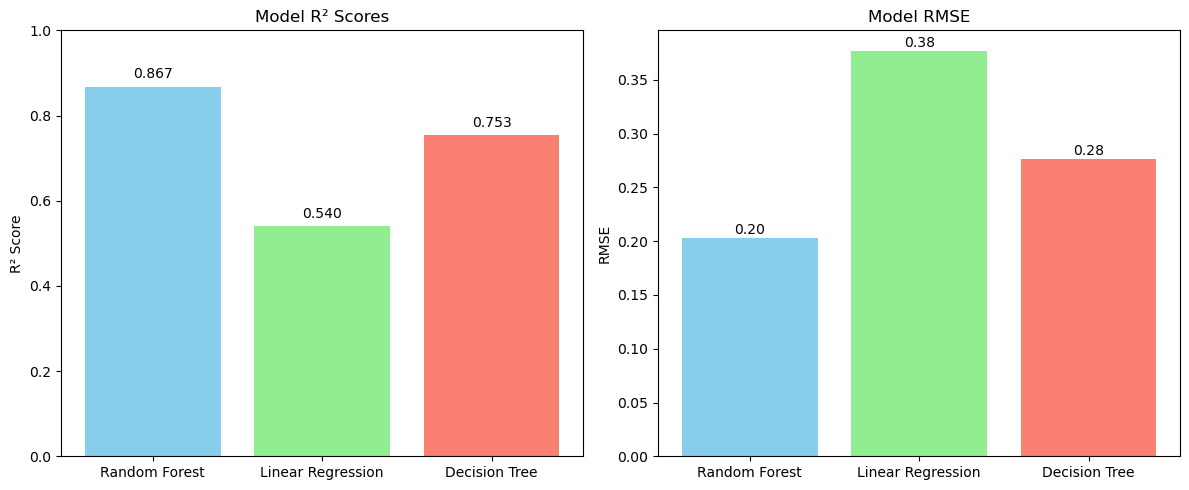

In [16]:
# Cell 9: Visualize Model Performance

import matplotlib.pyplot as plt

# Extract metrics
model_names = list(results.keys())
r2_scores = [results[m]['R2'] for m in model_names]
rmse_scores = [results[m]['RMSE'] for m in model_names]

plt.figure(figsize=(12, 5))

# R² Score comparison
plt.subplot(1, 2, 1)
plt.bar(model_names, r2_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model R² Scores')
plt.ylabel('R² Score')
plt.ylim(0, 1)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')

# RMSE comparison
plt.subplot(1, 2, 2)
plt.bar(model_names, rmse_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
for i, v in enumerate(rmse_scores):
    plt.text(i, v + max(rmse_scores)*0.01, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


In [17]:
# Cell 10: Final Analysis Summary

# Identify best model by R² score
best_model_name = max(results, key=lambda m: results[m]['R2'])
best_metrics = results[best_model_name]

print("="*60)
print("TASK 1: FINAL SUMMARY")
print("="*60)
print(f"Best Model: {best_model_name}")
print(f" - R² Score: {best_metrics['R2']:.4f}")
print(f" - RMSE: {best_metrics['RMSE']:.4f}")
print("\nAll Model Metrics:")
for name, vals in results.items():
    print(f"{name}: R²={vals['R2']:.4f}, RMSE={vals['RMSE']:.4f}")

# Sample predictions from best model
model = results[best_model_name]['model']
sample_preds = model.predict(X_test[:5])
print("\nSample Predictions (First 5 Test Samples):")
for i, pred in enumerate(sample_preds):
    actual = y_test.iloc[i]
    print(f"Sample {i+1}: Predicted={pred:.2f}, Actual={actual:.2f}, Delta={abs(pred-actual):.2f}")


TASK 1: FINAL SUMMARY
Best Model: Random Forest
 - R² Score: 0.8670
 - RMSE: 0.2028

All Model Metrics:
Random Forest: R²=0.8670, RMSE=0.2028
Linear Regression: R²=0.5398, RMSE=0.3773
Decision Tree: R²=0.7533, RMSE=0.2762

Sample Predictions (First 5 Test Samples):
Sample 1: Predicted=2.98, Actual=2.90, Delta=0.08
Sample 2: Predicted=3.54, Actual=3.90, Delta=0.36
Sample 3: Predicted=2.71, Actual=2.80, Delta=0.09
Sample 4: Predicted=2.29, Actual=2.30, Delta=0.01
Sample 5: Predicted=3.06, Actual=3.20, Delta=0.14


In [18]:

# Cell 11: Save Model and Results for Submission

import joblib
import os

# Create directories for saving outputs
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)

# 1. Save the best model
best_model = results[best_model_name]['model']
joblib.dump(best_model, f'models/best_model_{best_model_name.replace(" ", "_")}.pkl')
print(f"Saved best model as models/best_model_{best_model_name.replace(' ', '_')}.pkl")

# 2. Save performance metrics to CSV
import pandas as pd
metrics_df = pd.DataFrame([
    {'Model': name, 'R2': vals['R2'], 'RMSE': vals['RMSE']}
    for name, vals in results.items()
])
metrics_df.to_csv('results/model_performance_metrics.csv', index=False)
print("Saved model performance metrics to results/model_performance_metrics.csv")

# 3. Save sample predictions
sample_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True)[:5],
    'Predicted': best_model.predict(X_test[:5])
})
sample_df['Delta'] = (sample_df['Actual'] - sample_df['Predicted']).abs()
sample_df.to_csv('results/sample_predictions.csv', index=False)
print("Saved sample predictions to results/sample_predictions.csv")

# 4. Save feature importances if available
if hasattr(best_model, 'feature_importances_'):
    fi = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    fi.to_csv('results/feature_importances.csv', index=False)
    print("Saved feature importances to results/feature_importances.csv")


Saved best model as models/best_model_Random_Forest.pkl
Saved model performance metrics to results/model_performance_metrics.csv
Saved sample predictions to results/sample_predictions.csv
Saved feature importances to results/feature_importances.csv
